# Schlaflose Nächte
Ich habe sehr viel Zeit darauf verwendet ein Datenset zu finden, welches spannend ist und für meine Zwecke genutzt werden kann. Als Quelle für meine Datensets habe ich Kaggle genutzt.
## Meine Vorraussetzungen
Dadurch, dass wir SVM, KNN oder Entscheidungsbäume nutzen sollten, wollte ich ein Datenset, welches gut klassifizierbar ist, aber keine Bilddaten oder ähnliches nutzt, also gut geeignet für die obigen Verfahren ist. Außerdem sollte eine Erkenntnis daraus hervorgehen können und mir Spaß machen.
## Die Entscheidung
Mein erster Gedanke war, dass Titanic Datenset zu nutzen. Es ist sehr bekannt, gut klassifizierbar, macht Spaß zu erforschen und hat ein paar nette Zusammenhänge zwischen der Schiffsarchitektur/dem Kartenverkauf und der Überlebensrate. Leider ist es zu viel schon genutzt wurden und es gibt auch keine Interessanten Forschungsthemen auf dem Gebiet.  
Deswegen bin ich über sozial wichtige Themen - die schwierig klassifizierbar sind - zu Krankheiten und deren Diagnose und schließlich - sehr schlaftrunken - zu dem Thema Schlafqualität gekommen.
## Das Datenset
[Sleep-Health-Lifestyle](https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset) heißt das Datenset und beschäftigt sich mit Gewohnheiten, Berufen, Geschlechtern und dem Schlaf von 374 Menschen. Es fehlen keine Daten, was den Datenaufbereitungsschritt etwas langweiliger macht, aber auch dort gibt es kleine Hürden.
## Das Ziel
Am Ende des Notebooks würde ich gerne wissen, welche Hauptursachen für guten Schlaf aus dem Datenset heraus zu lesen sind und meine eigenen Daten angeben, um zu schauen, ob die trainierten Modelle auch mit Fremddaten umgehen können, oder ob die Daten einen Bias haben.
# Daten aufbereiten
## Imports


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Datenset in Google Colab laden
Die eine Möglichkeit in Google Colab daten zu laden ist per Drive
```python
from google.colab import drive

drive.mount('/content/drive')
df =pd.read_csv("drive/My Drive/ColabDrive/MovieData/movies_metadata.csv")
df.head()
```
Die andere Möglichkeit ist es direkt eine CSV Datei hochzuladen:
[Hier](https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset/download?datasetVersionNumber=2) der direkte Link zum Download der CSV Datei.
(Vorsicht: Die Datei muss gleich benannt sein)
```python
from google.colab import files
import io

#df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
try:
  uploaded = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
except:
  files.upload()
  uploaded = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
uploaded.head()
```
Ich habe mich aber für die Möglichkeit entschieden, Git zu nutzen, weil ich dort keine Rechte für meine Drive abgeben muss und keine manuelle Eingabe von Nöten ist.

In [ ]:
try:
  dataset = pd.read_csv('MLHausarbeit/Sleep_health_and_lifestyle_dataset.csv')
except:
  !git clone https://github.com/Arne-Berner/MLHausarbeit.git
  dataset = pd.read_csv('MLHausarbeit/Sleep_health_and_lifestyle_dataset.csv')
dataset.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


## Kategorien der Daten
Person Id - Eine Id, welche die Personen einzigartig zuordnet. Die Personen sind von 1 durchnummeriert. Dies könnte für einen Bias sorgen, sollten die Daten nicht randomisiert sein.  
Age - Alter der Person in ganzen Jahren  
Occupation - Beruf der Person (es sind nur wenige Berufe vertreten)  
Sleep Duration - Dauer des Schlafs in Stunden  
Quality of Sleep - Qualität des Schlafs von 1 bis 9  
Physical Activity Level - Sportliche Aktivität von 0 bis 99%  
Stress level - Level an Stress, wobei 1 wenig und 9 das maximum ist
BMI Category - BMI Kategorie von normal bis fettleibig
Blood Pressure - Blutdruck angegeben in Systole/Diastole
Heart Rate - Herzfrequenz
Daily Steps - tägliche Schritte, wie sie von einem Smartphone oder ähnlichem gezählt werden
Sleep Disorder - Schlafstörungen
## Daten prüfen und nach nullwerten suchen
## Überblick über Daten verschaffen
Als erstes schaue ich, ob es null Values gibt und was für Daten typen die einzelnen Spalten haben. Das ist zwar auf Kaggle schon durch eine gute Dokumentation ersichtlich, aber trotzdem sollte es nochmal geprüft werden.

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


Da keine null Werte vorzufinden sind, schaue ich mir die Statistik hinter den Daten etwas genauer an:

In [ ]:
dataset.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


Aus dieser Übersicht lassen sich einige Dinge erkennen:
- die Probanden sind zwischen 27 und 59 Jahren, also alle im arbeitsfähigen Alter
- auch wenn die Bewertung von 1 bis 9 für die Schlafqualität ging, ist die minimale Bewertung 4
- ähnliches gilt für die sportliche Aktivität, die von 30 bis 90 geht
- der Stress level wird selbst von Menschen in sehr stressigen Berufen nur bis zu einer 8 eingeschätzt
- die Herzfrequenz lässt darauf schließen, dass keine Ausdauersportler unter den Probanden waren
- der statistische Mittelwert für die Schritte deutet mit der std auf eine erstaunlich gleichmäßige Verteilung hin

In [ ]:
print(dataset.nunique())

Person ID                  374
Gender                       2
Age                         31
Occupation                  11
Sleep Duration              27
Quality of Sleep             6
Physical Activity Level     16
Stress Level                 6
BMI Category                 4
Blood Pressure              25
Heart Rate                  19
Daily Steps                 20
Sleep Disorder               3
dtype: int64


In [ ]:
dataset.drop('Person ID', axis=1).duplicated().sum()

242

In [ ]:
dataset.describe(include='O')

,Gender,Occupation,BMI Category,Blood Pressure,Sleep Disorder
count,374,374,374,374,374
unique,2,11,4,25,3
top,Male,Nurse,Normal,130/85,None
freq,189,73,195,99,219


Für eine feinere Auswertung der Daten und mehr Input für die Algorithmen könnten hier auch noch die Systole und Diastole voneinander getrennt aufgenommen werden. Unter Umständen ist die Diastole ausreichend, welche eher auf Bluthochdruck hinweist.

In [ ]:
df = pd.concat([dataset, dataset['Blood Pressure'].str.split('/', expand=True)], axis=1).drop(
    'Blood Pressure', axis=1)
df=df.rename(columns={0: 'BloodPressure_high', 1: 'BloodPressure_low'})
df['BloodPressure_high'] = df['BloodPressure_high'].astype(float)
df['BloodPressure_low'] = df['BloodPressure_low'].astype(float)
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,BloodPressure_high,BloodPressure_low
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,126.0,83.0
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125.0,80.0
2,3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125.0,80.0
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140.0,90.0
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140.0,90.0


In [ ]:
print(df.columns)

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Heart Rate', 'Daily Steps', 'Sleep Disorder',
       'BloodPressure_high', 'BloodPressure_low'],
      dtype='object')


In [ ]:
df.tail()

<ipython-input-9-40bb1c11e3ac>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


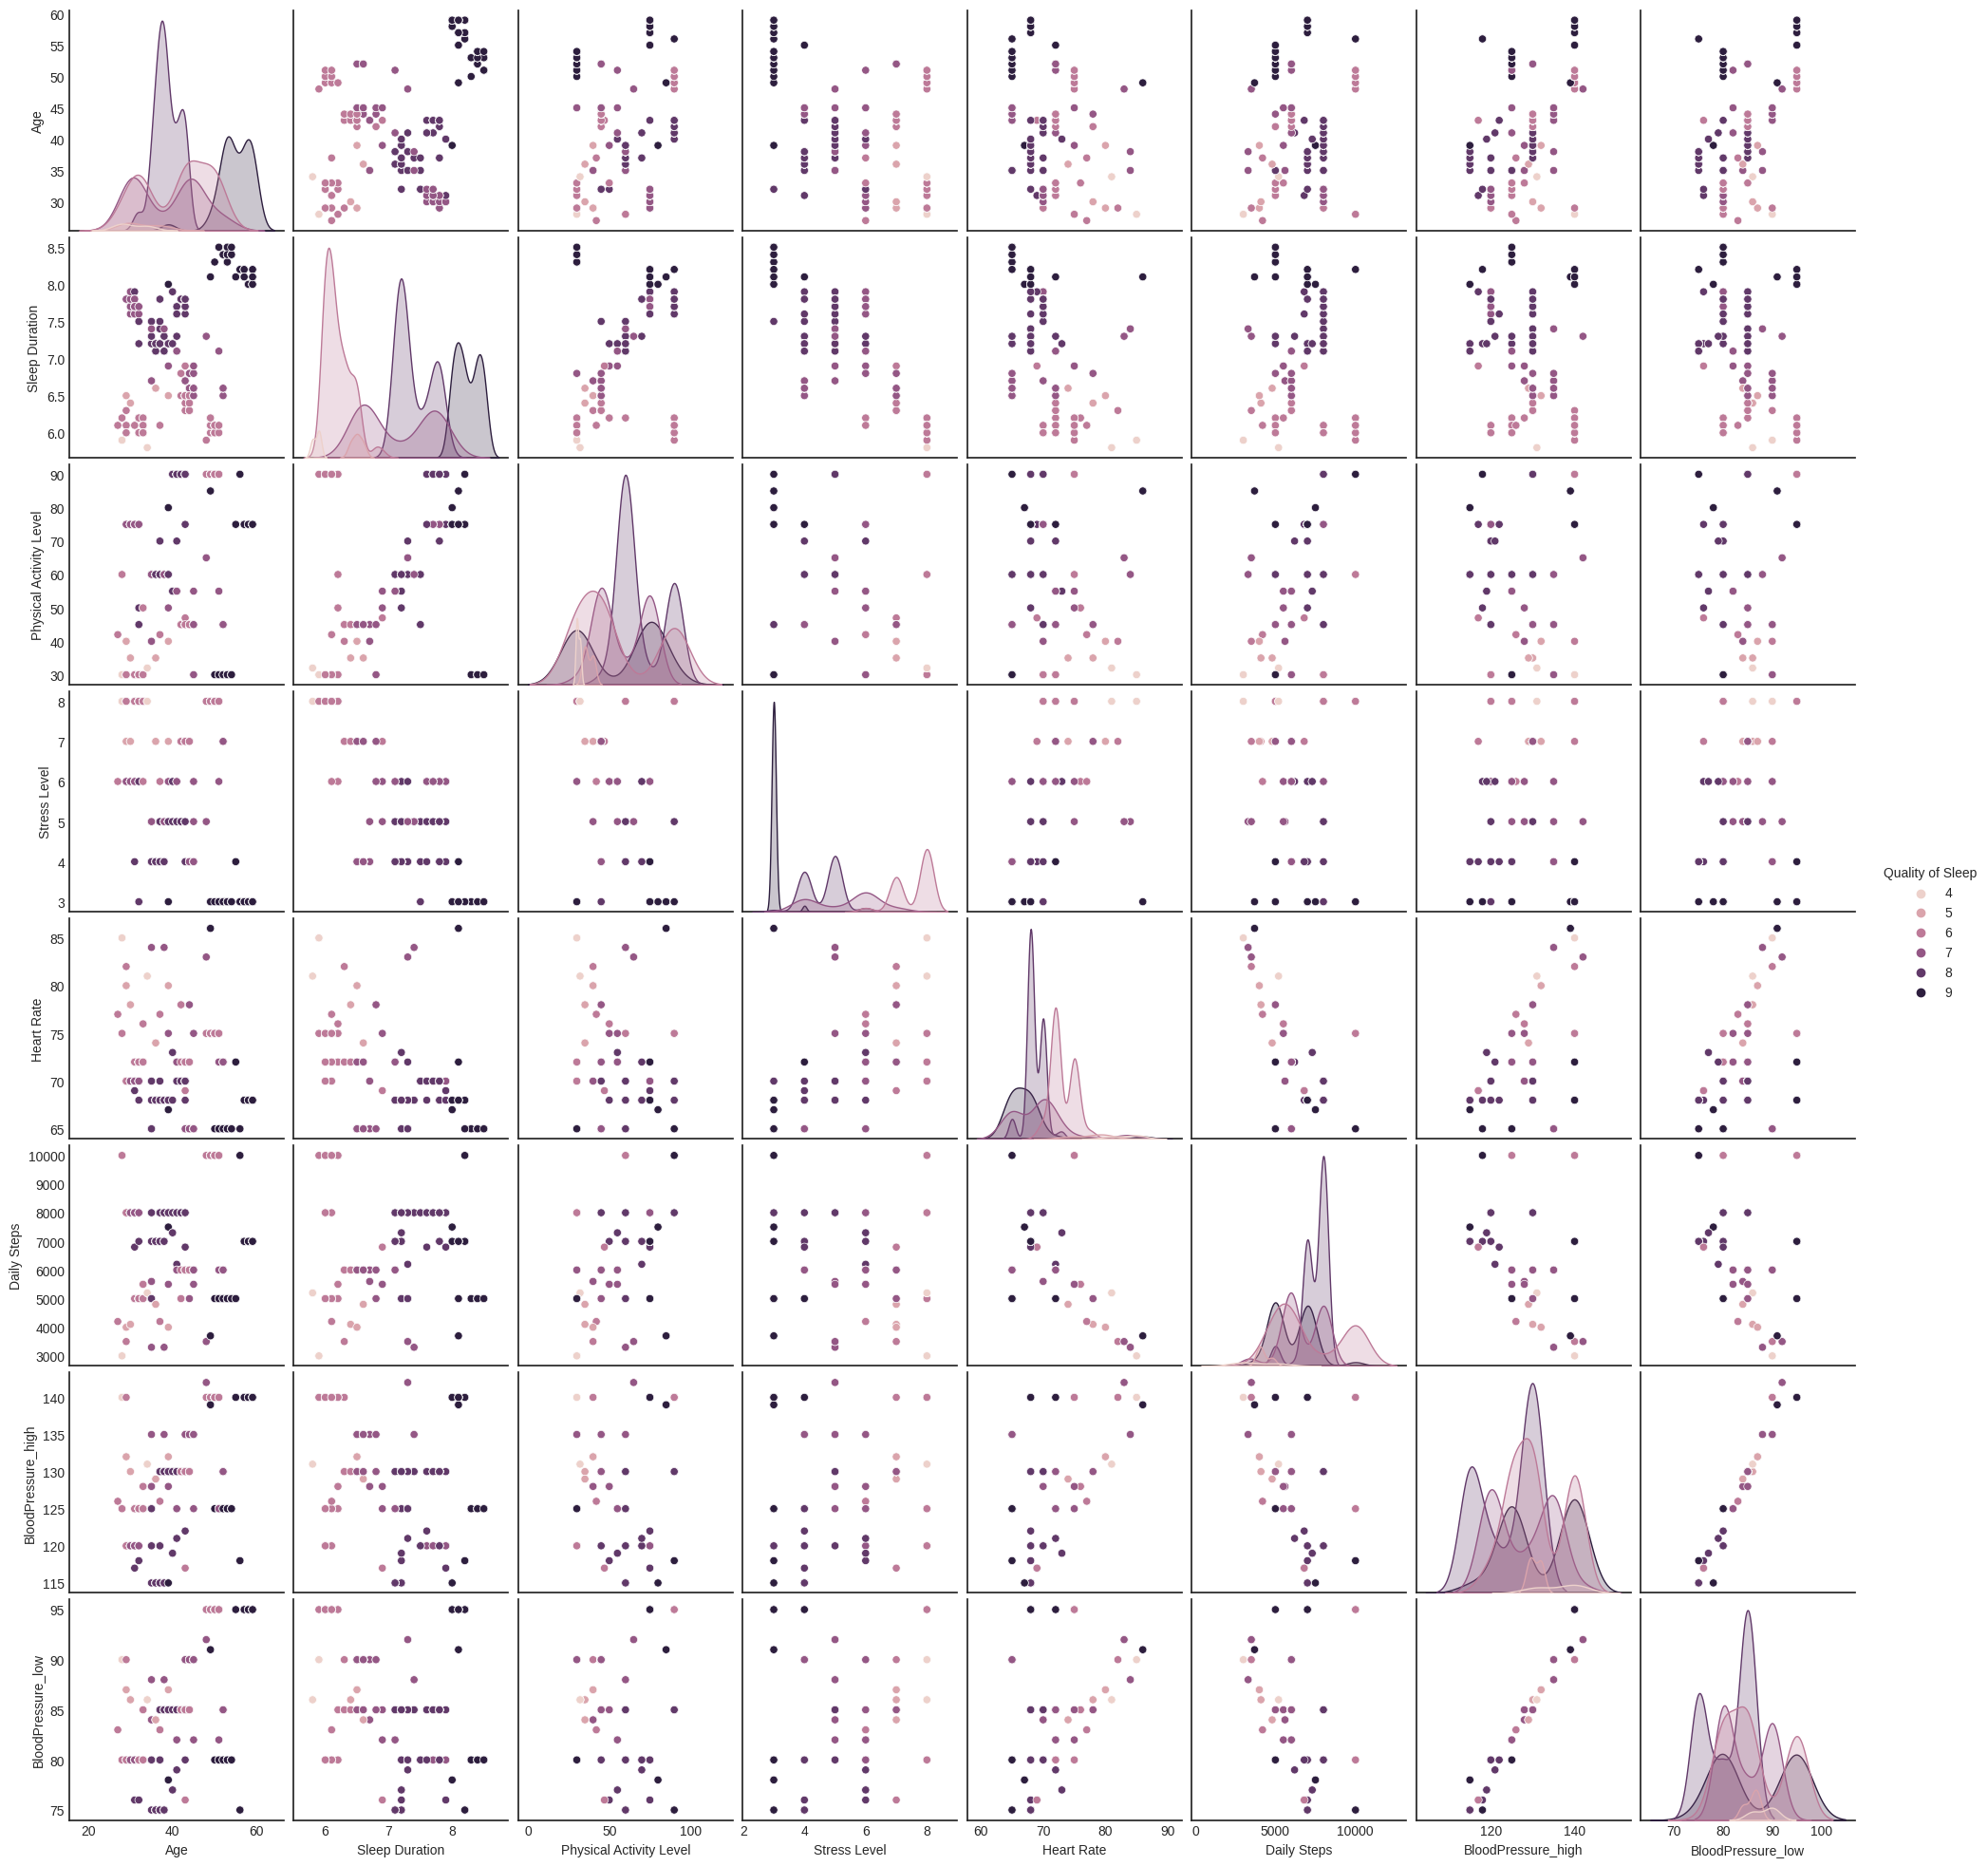

In [ ]:
plt.style.use('seaborn-white')
sns.pairplot(data=df.drop('Person ID',axis=1),hue='Quality of Sleep')
plt.legend()
plt.show()

In [ ]:
df['Occupation'].value_counts()

Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: Occupation, dtype: int64

Es fällt auf, dass nur studierte Menschen an dieser Umfrage teilgenommen haben. Das heißt es ist davon auszugehen, dass der Alltag nicht von einer hohen körperlichen Anstrengung geprägt ist. Die ausnahme bildet das Pflegepersonal.

In [ ]:
df.groupby('BMI Category')['Occupation'].value_counts()

BMI Category   Occupation          
Normal         Doctor                  65
               Engineer                56
               Lawyer                  42
               Accountant              26
               Teacher                  6
Normal Weight  Nurse                    7
               Accountant               5
               Engineer                 4
               Doctor                   2
               Software Engineer        2
               Lawyer                   1
Obese          Doctor                   4
               Lawyer                   2
               Sales Representative     2
               Software Engineer        1
               Teacher                  1
Overweight     Nurse                   66
               Teacher                 33
               Salesperson             32
               Accountant               6
               Scientist                4
               Engineer                 3
               Lawyer                   

Spannend ist, dass 66/73 vom Pflegepersonal übergewichtig sind, obwohl sie in einem physisch anstrengenden Beruf arbeiten. Dies könnte an der Berechnung des BMI liegen, welche Muskelmasse außer acht lässt. Die Vermutung lässt sich einfach prüfen.

In [ ]:
df.groupby('Physical Activity Level')['Occupation'].value_counts()

Physical Activity Level  Occupation          
30                       Engineer                32
                         Doctor                  31
                         Sales Representative     2
                         Teacher                  2
                         Software Engineer        1
32                       Scientist                2
35                       Nurse                    2
                         Teacher                  2
40                       Teacher                  3
                         Nurse                    2
                         Engineer                 1
42                       Nurse                    1
                         Software Engineer        1
45                       Salesperson             32
                         Teacher                 27
                         Accountant               6
                         Engineer                 3
47                       Engineer                 1
50                

Wie vermutet bewegen sich (wahrscheinlich die gleichen 66) Pflegekräfte im Bereich über 75%. Eine spannende These für die Auswertung könnte hier sein, ob ein physischer Beruf für einen besseren oder schlechteren Schlaf sorgt. Dabei Stünden die Ingenieure auf der anderen Seite des Spektrums.

In [ ]:
sns.set_theme(style="white")

# Plot miles per gallon against horsepower with other semantics
sns.relplot(x='Physical Activity Level', y='Quality of Sleep', hue='Occupation',
            palette="muted", data=df.query('Occupation = "Nurse"'))


# plt.style.use('seaborn-white')
# sns.pairplot(data=df.drop('Person ID',axis=1),hue='Quality of Sleep')
# plt.legend()
# plt.show()

ValueError: ignored

In [ ]:
fig=plt.treemap(df,path=[px.Constant('Jobs'),'Sleep Disorder','Occupation'],
               color='Sleep Disorder',
              color_discrete_sequence=['#EBDEF0','#C39BD3','#4A235A'])


fig.update_layout(title='<b>The effect of job on sleep</b>..',
                 title_font={'size':20})


fig.show()
# Als inspiration für obige Thesen

### Ausreißer finden
### Duplikate vorhanden?



## Techniken zur Augmentation
### Randomisieren
Es ist nie auszuschließen, dass Daten einen Bias haben, wenn sie in einer bestimmten Reihenfolge geladen werden, deswegen randomisiere ich das Datenset vorher einmal.
### Noise
Ist in diesem Falle nicht möglich und würde die Ergebnisse verfälschen
### Skalieren
Ist für die genutzten Verfahren nicht nötig

Hier sollen die Daten bereinigt werden.
Gibt es Datenlücken?
Gibt es widersprüchliche Daten oder Duplikate?
Sind ausreißer bei der Titanic vielleicht sogar ein Indiz auf Tod/Lebend?0
Tod/Lebendig daten in 0 und 1 umwandeln, anstatt ja und nein.


Hier sollen die Daten skalliert werden. (Zwischen 0 und 1 ist glaube ich gut??)

Hier sollen die Daten für cross validation vorbereitet werden? Oder sollte ich sie einfach durch einen cross validation layer schicken?
Kann auch genutzt werden, um Hyperparameters zu finden.
Zum setzen der Hyperparameter mit cross validation ist simulated annealing cool.

Falls SVM gewählt: Cross validation nutzen, um die softmargin zu bestimmen. Soft margin statt hard margin benutzen, weil es mit "Ausreißern" besser umgeht. Cross Validation hilft diese Soft margin sinnig zu setzen und nicht ausreißer als solche zu bezeichnen, obwohl sie keine sind.
Außerdem kann ich Cross validation benutzen, um den besten Kernel rauszufinden? (Am besten mit einem Validation Set noch dazu)
Radial Kernel verhält sich ähnlich wie weighted nearest neigbor

Falls Baum gewählt: Overfitting vermeiden ->
Trainingsgröße nicht zu groß und nicht zu klein
Nur splits erzeugen, wenn noch mehr als eine trainingsinstanz übrig ist (eigentlich sogar noch mehr, weil sonst 2 zu jeweils einem blatt aufgeteilt werden, was auswendig lernen ist)
Minimalen Informationsgewinn festlegen. (Nur splitten, wenn es einen Informationsgewinn gibt der > minimaler Informationsgewinn ist)
mindestkonfidenzniveau -> Spaltung in neue Blätter nur, wenn nicht zu sehr am rand geteilt wird (z.b. eine gruppe von 101 in 100 und 1 geteilt)

Hier soll in einer confusion matrix visualisiert werden, wie die predictions waren.



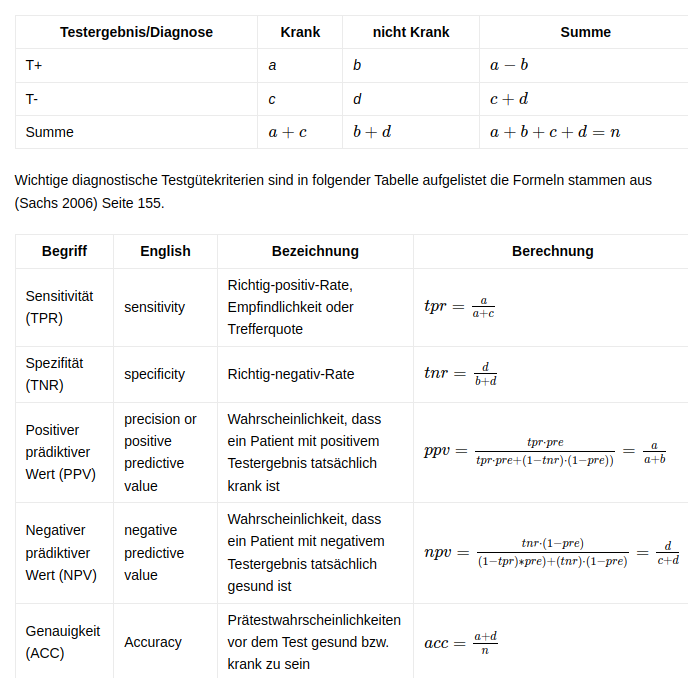

Hier muss Sensitivität, Spezifität und Genauigkeit hin.

Evaluation: Es muss bei der Titanic keine ROC kurve betrachtet werden, weil ähnlich viele gestorben sind, wie überlebt haben.